In [1]:
from proteus.iproteus import * 
from proteus import default_n, default_s, default_so
Profiling.logLevel=5
Profiling.verbose=False

In [2]:
import variable_density2D.guermond_example_variable_density_so as so
display_src(so)

```Python
from proteus.default_so import *
from proteus import Context
import guermond_example_variable_density
Context.setFromModule(guermond_example_variable_density)
ctx = Context.get()

pnList = [("mom_p", "mom_n"),
          ("rho_p", "rho_n")]

name = "guermond_example_variable_density_p"

systemStepControllerType = Sequential_MinAdaptiveModelStep

needEBQ_GLOBAL = False
needEBQ = False

tnList = ctx.tnList

```


In [3]:
from proteus import Comm
import os
from importlib import import_module

pList=[]
nList=[]
so.sList=[]
for (p,n) in so.pnList:
    so.sList.append(default_s)
    pList.append(import_module('variable_density2D.'+p))
    nList.append(import_module('variable_density2D.'+n))
    pList[-1].name = p
opts.save_dof = True
opts.dataDir='.'
opts.probDir='.'
Profiling.logLevel=3
Profiling.verbose=False

In [4]:
ns = NumericalSolution.NS_base(so, pList, nList, so.sList, opts)
ns.calculateSolution('run1')

TriangleBaseMesh nbase=1 baseFlags= q30DenA 
flags =  q30DenA  must have p, appending
fluxBoundaryCondition_components set([0, 1, 2])
fluxBoundaryCondition_components set([0])


False

In [5]:
# from tables import openFile
# h5=openFile("guermond_example_variable_density_p0.h5","r")        
# print h5
# h5.close()


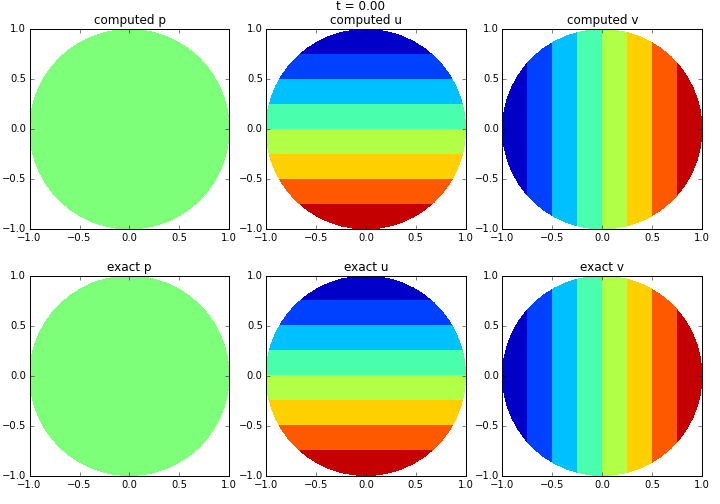
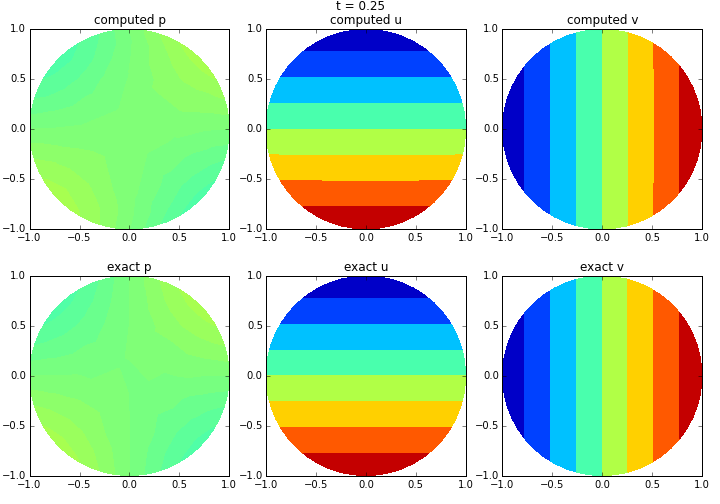
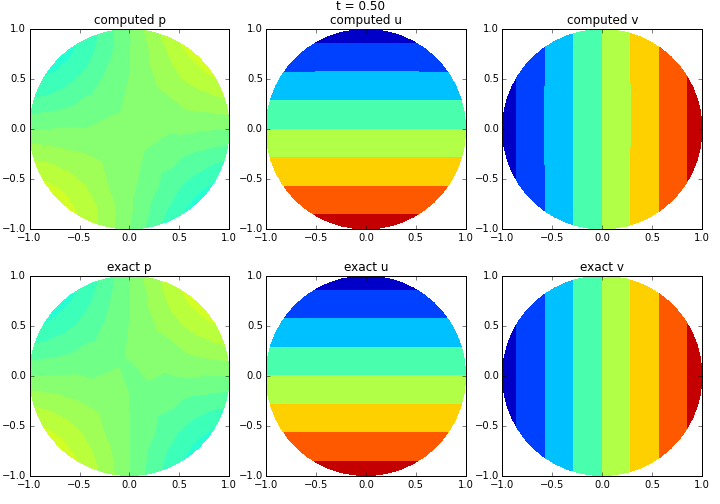
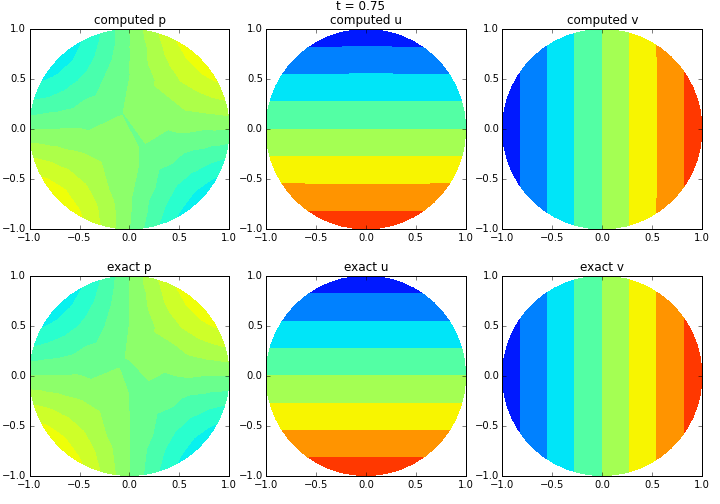
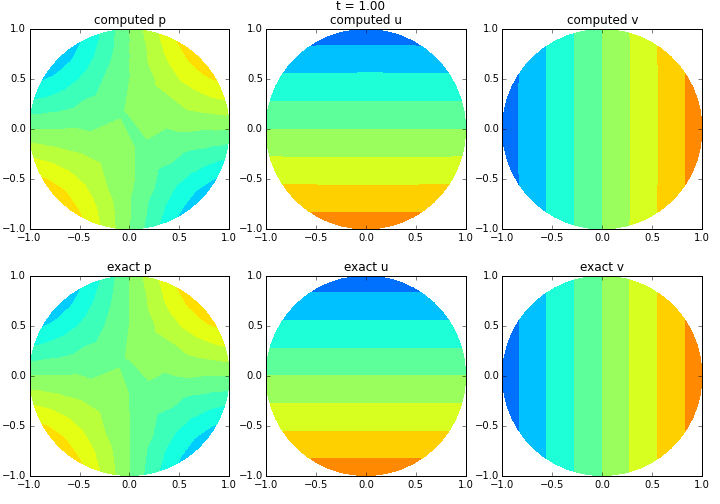
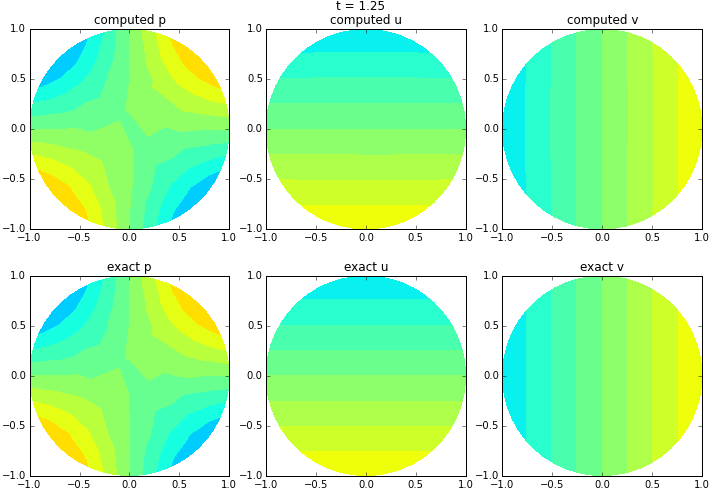
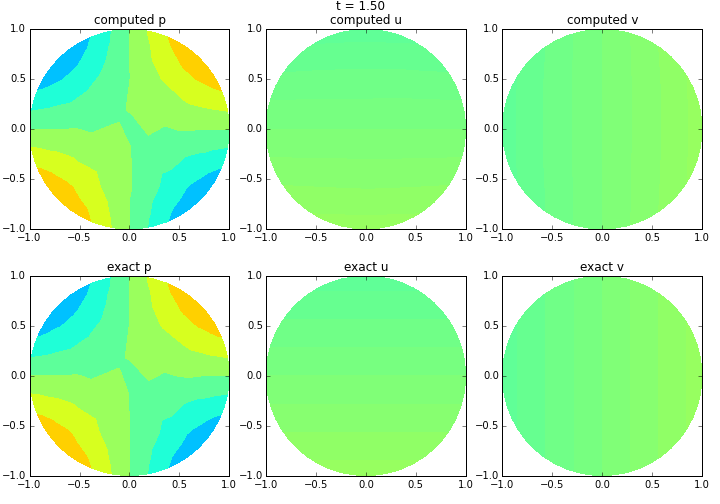
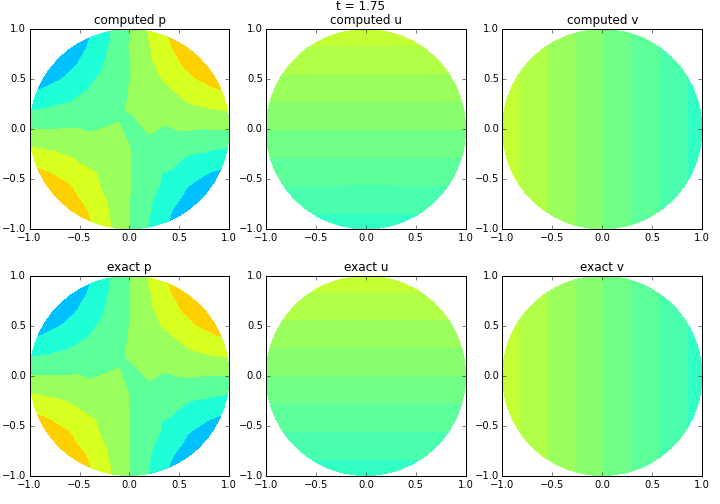
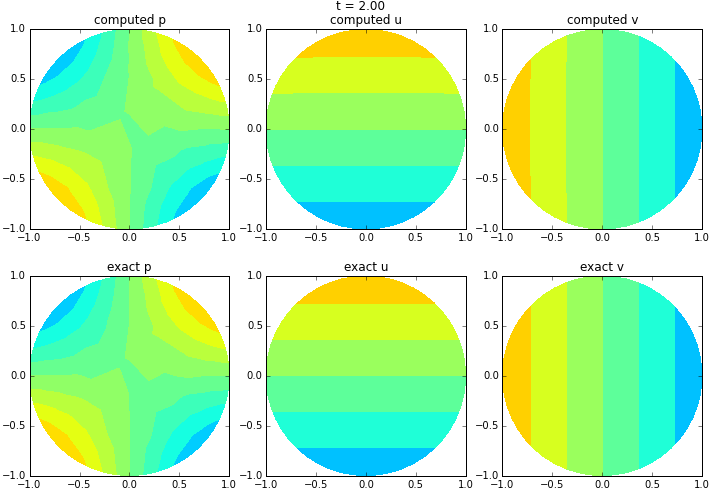
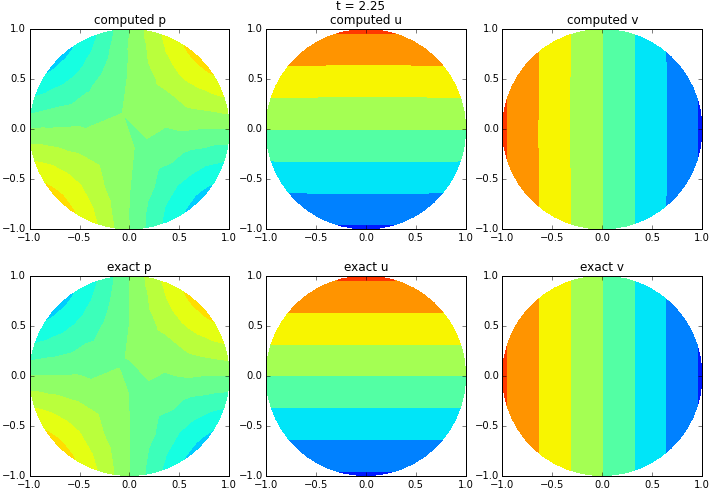
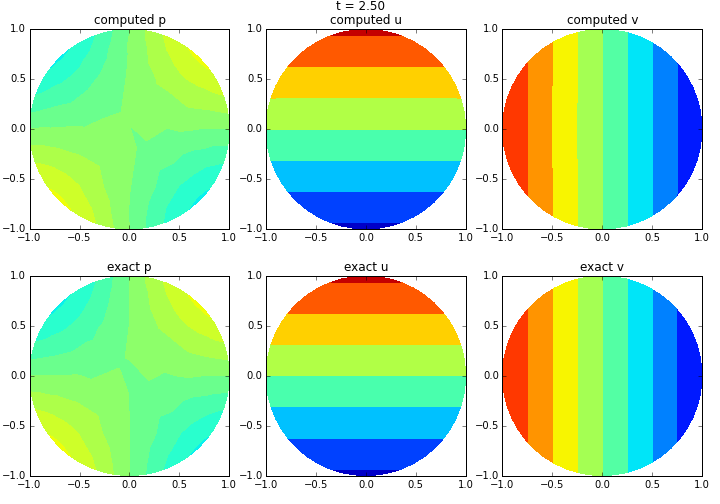
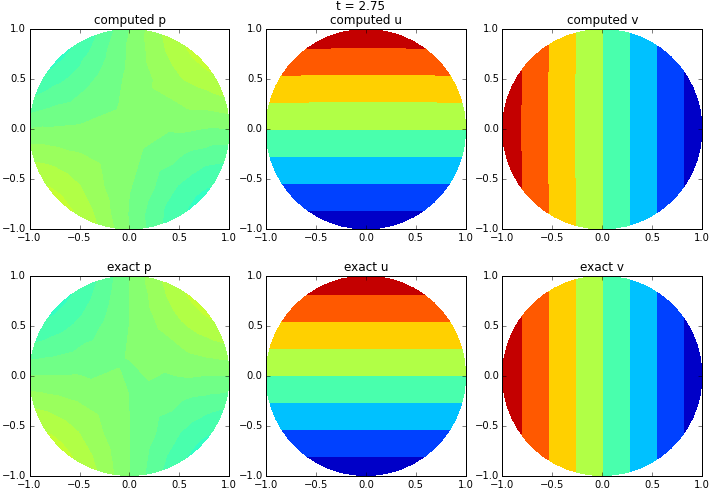
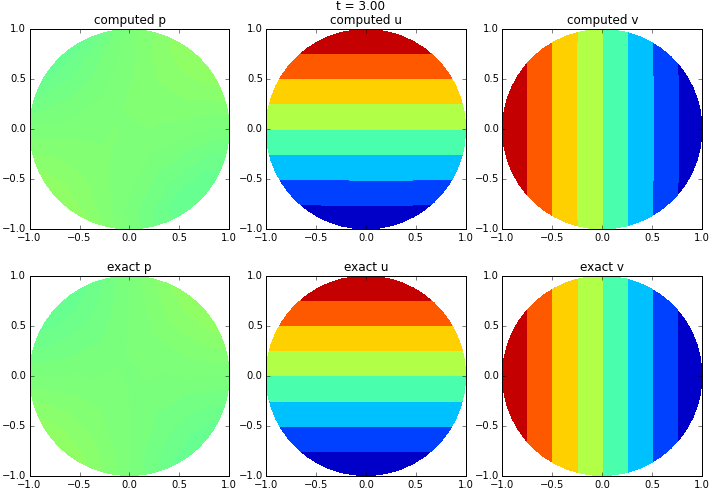
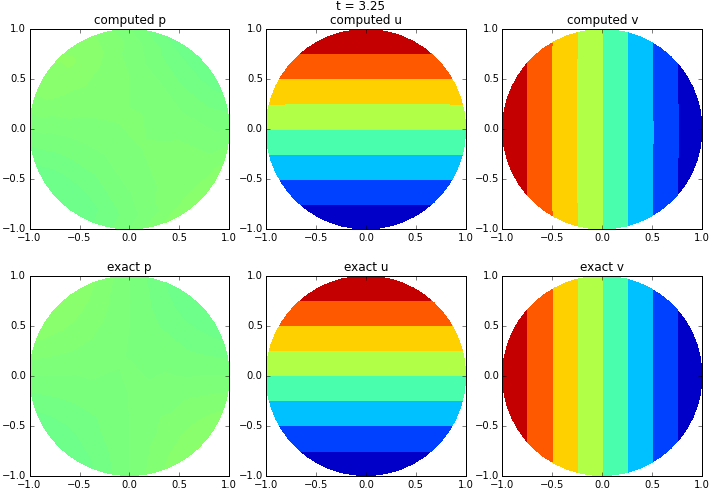
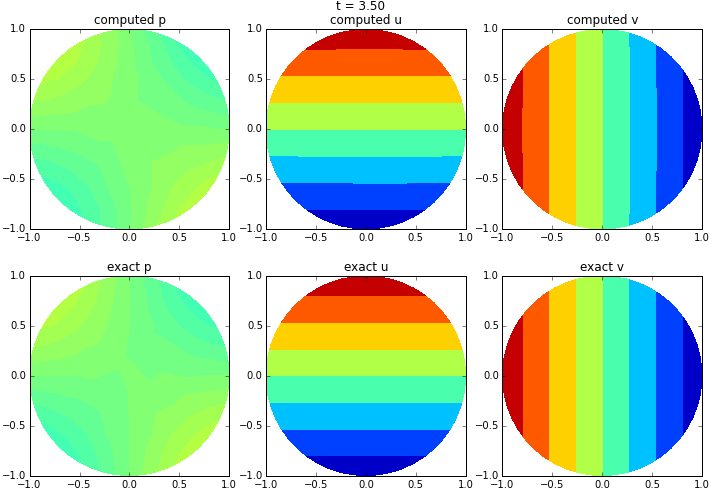
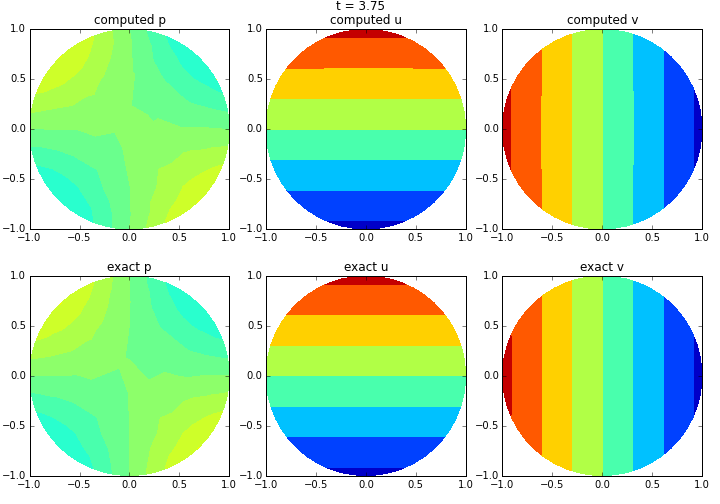
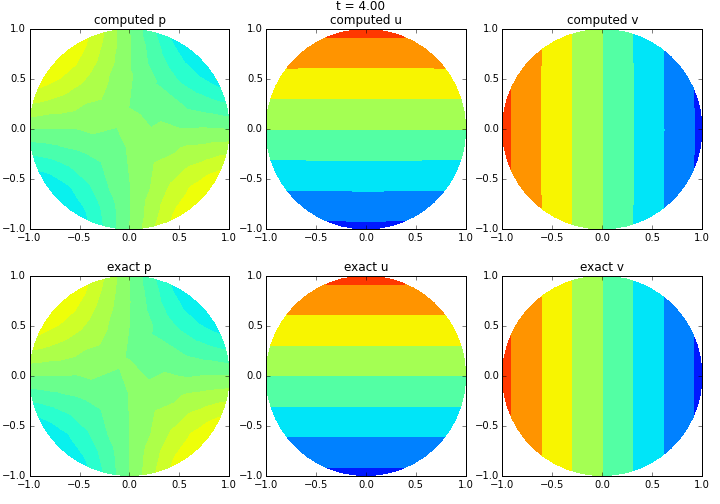
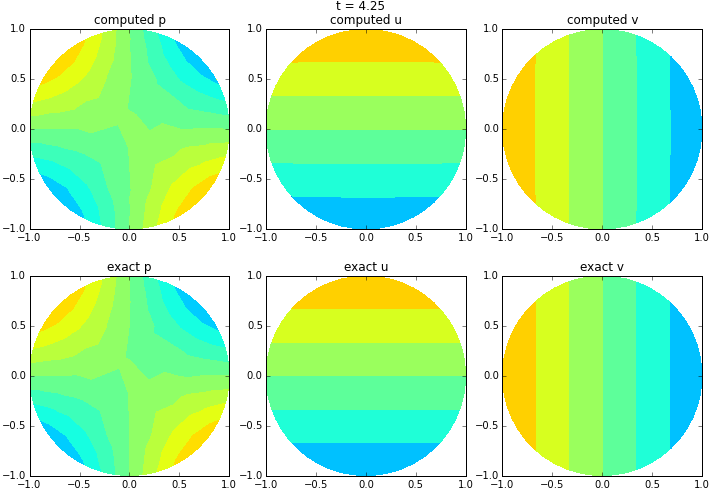
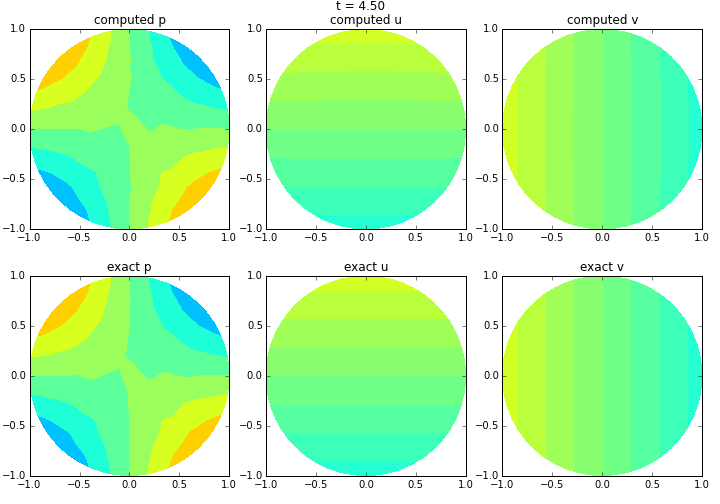
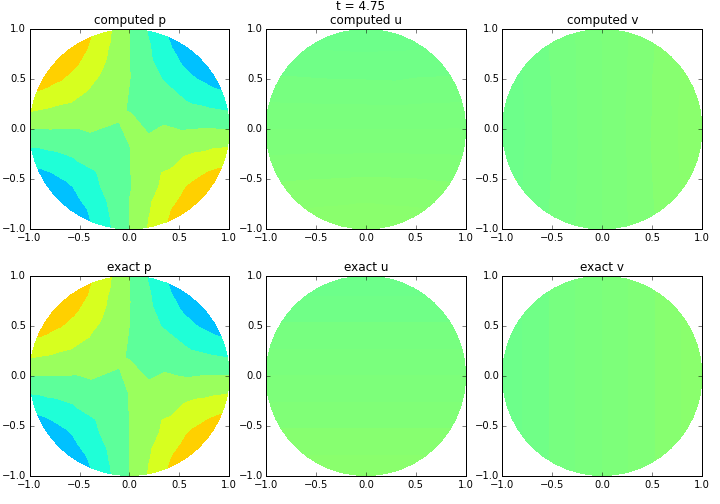
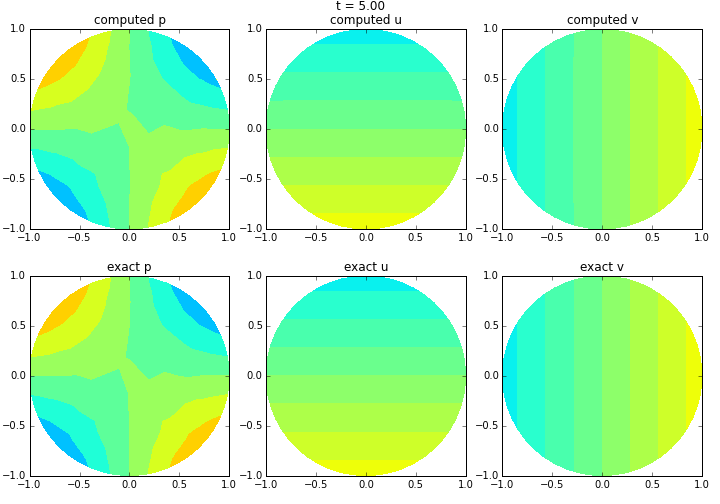
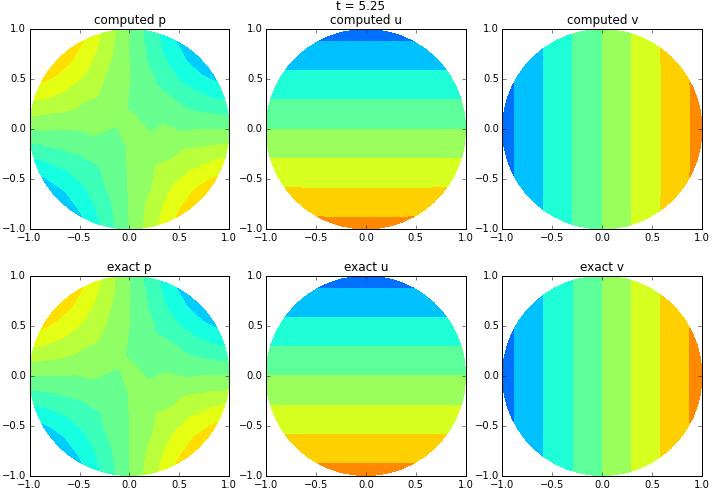
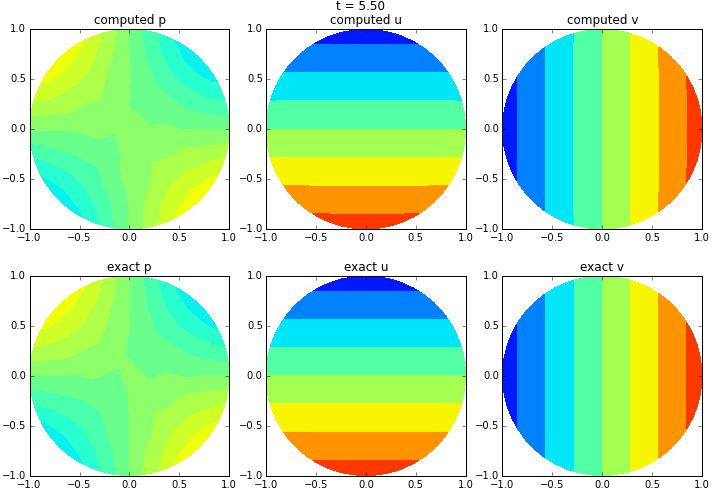
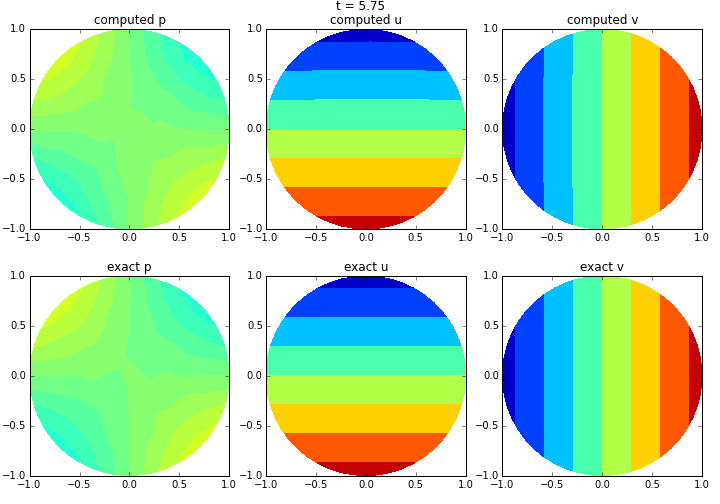
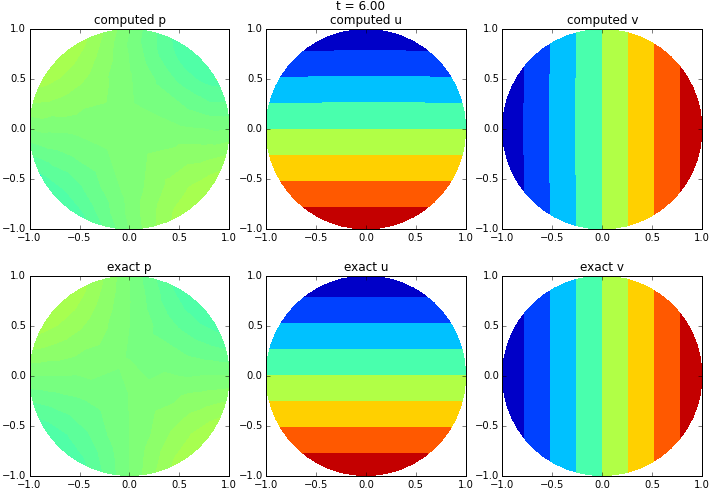
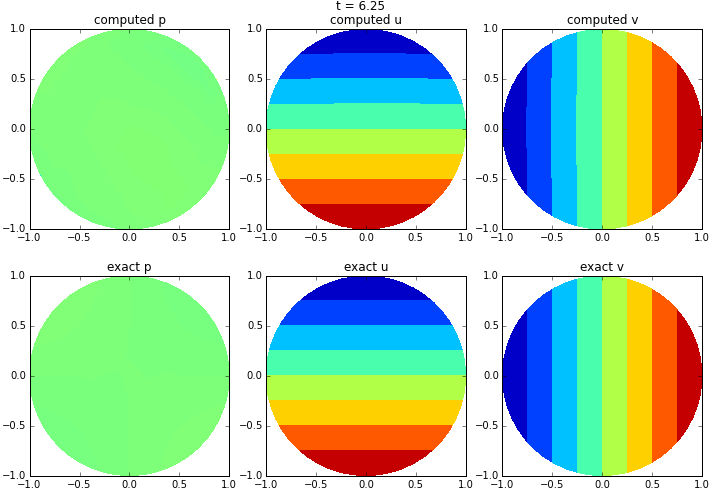
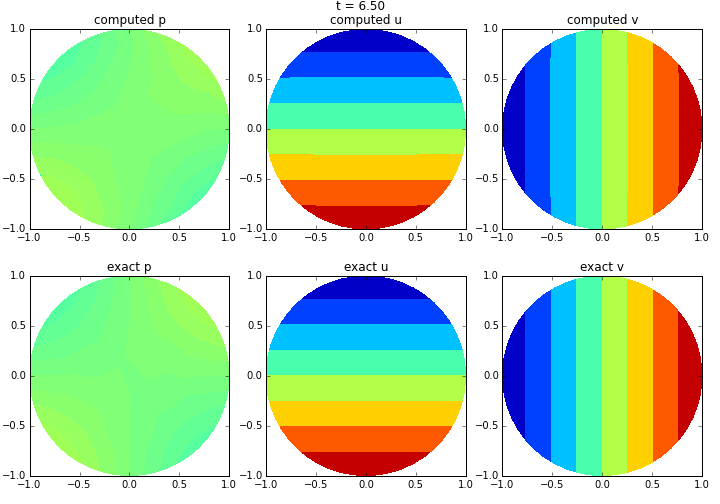
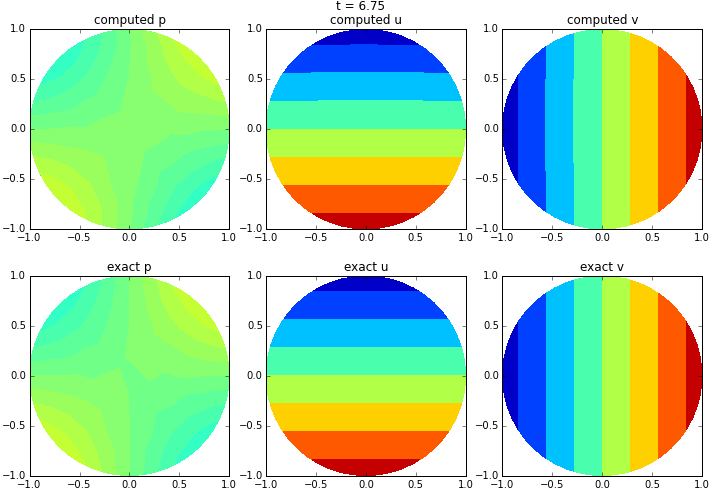
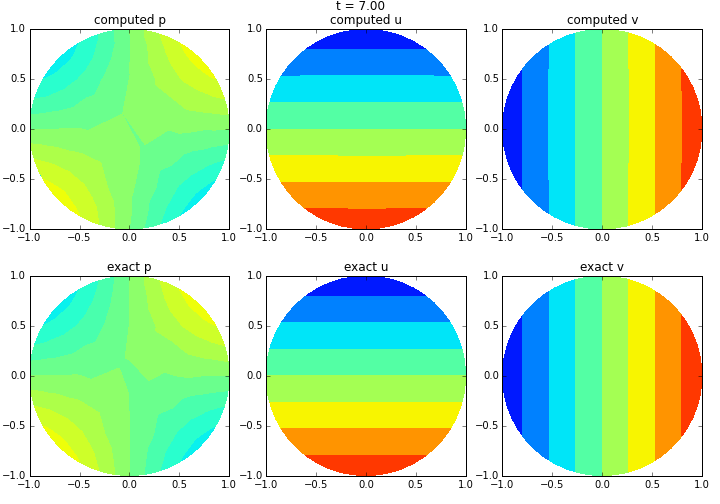
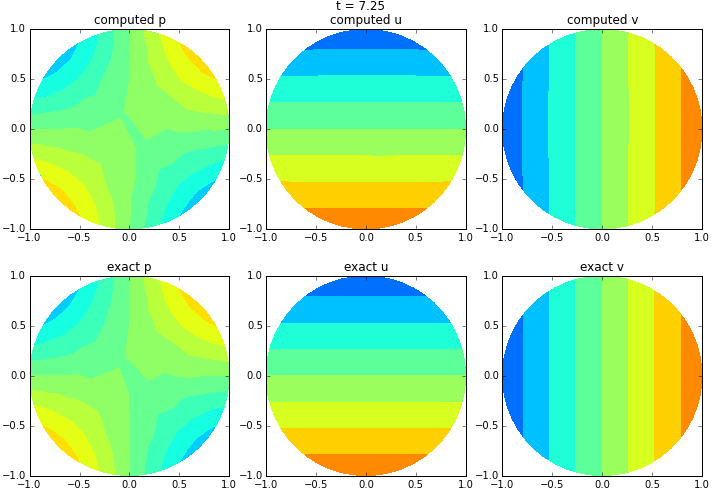
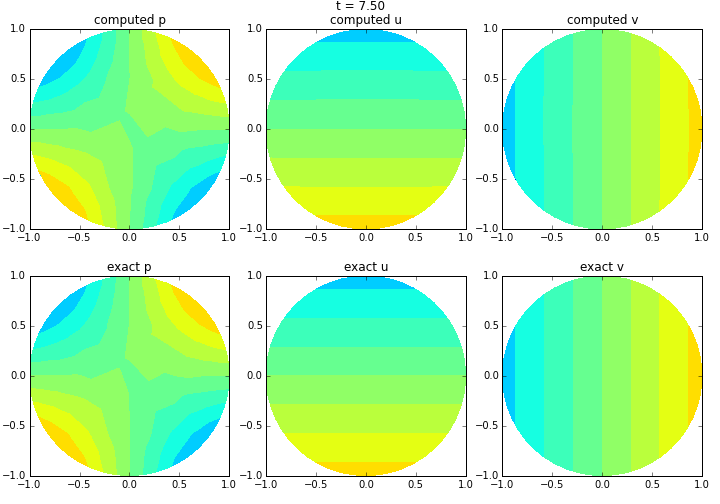
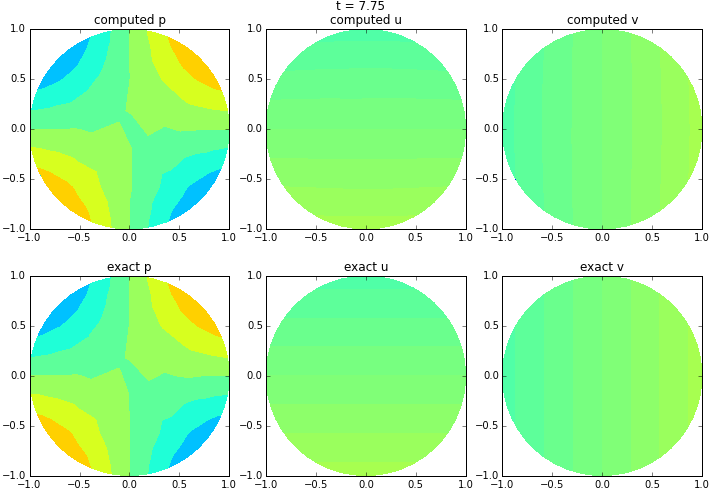
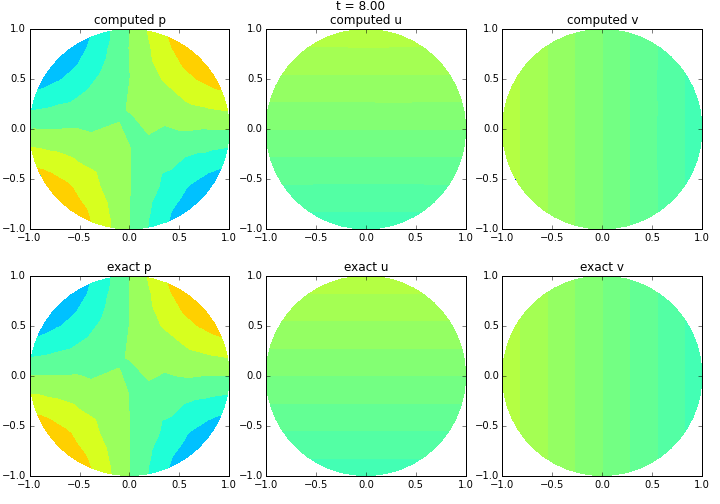
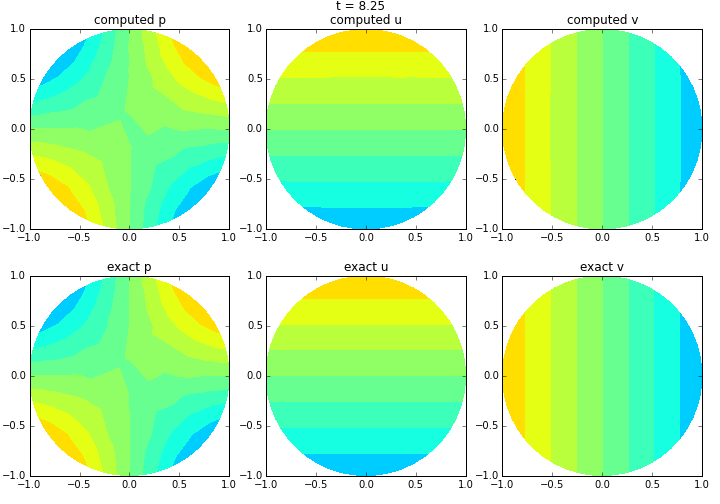
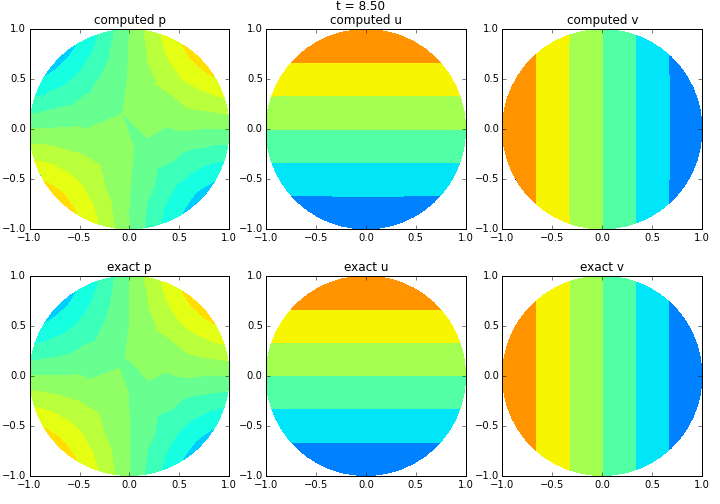
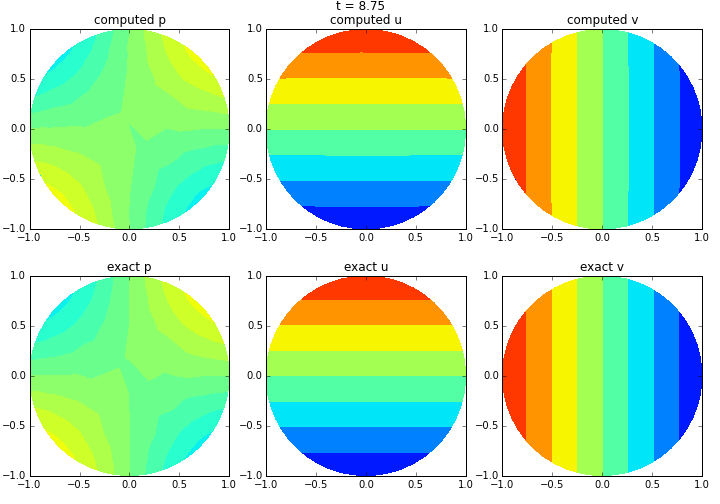
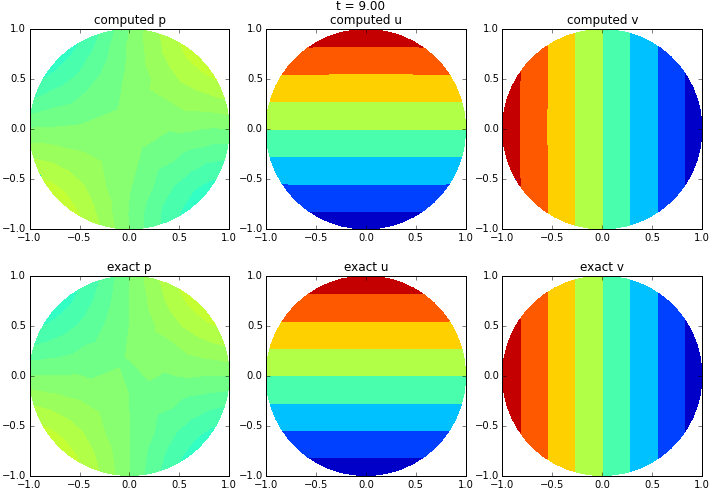
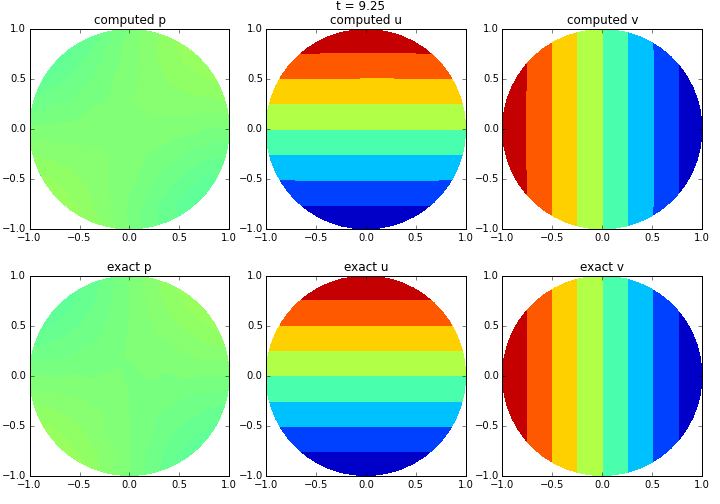
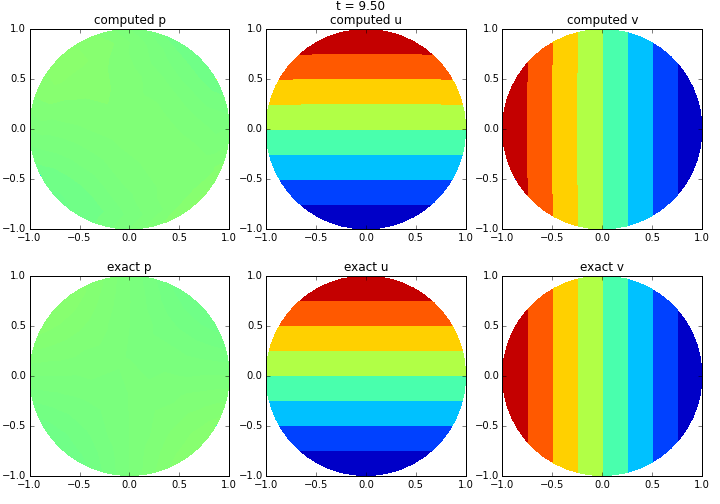
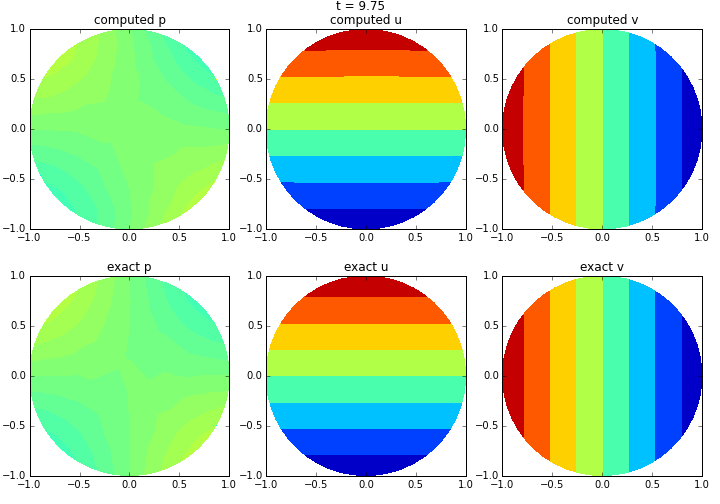
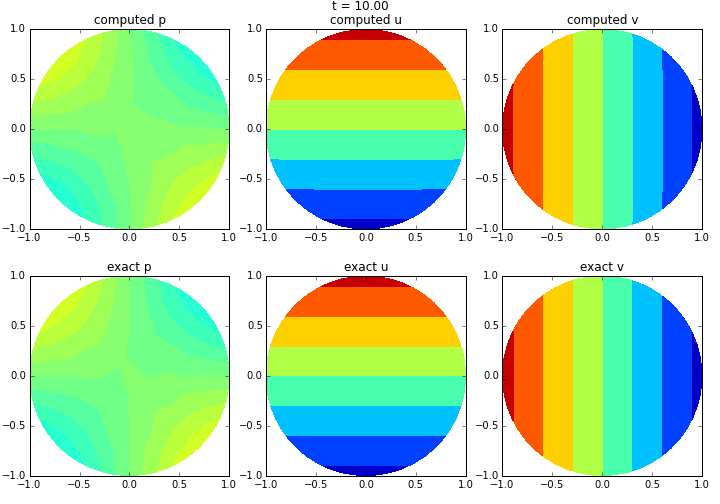

In [19]:

import numpy as np

import matplotlib
matplotlib.use('svg')
%matplotlib inline
from matplotlib  import pylab
# pylab.rcParams['figure.figsize'] = 16, 12

from matplotlib import  pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from tables import openFile




# setup initial figure spacing and create frames for input
fig = plt.figure(figsize=(10,7)) # w, h in inches

axu = fig.add_subplot(221)
axv = fig.add_subplot(222)
axeu = fig.add_subplot(223)
axev = fig.add_subplot(224)

# axp = fig.add_subplot(231)
# axu = fig.add_subplot(232)
# axv = fig.add_subplot(233)
# axep = fig.add_subplot(234)
# axeu = fig.add_subplot(235)
# axev = fig.add_subplot(236)
# axp.set_aspect('equal')
axu.set_aspect('equal')
axv.set_aspect('equal')
# axep.set_aspect('equal')
axeu.set_aspect('equal')
axev.set_aspect('equal')
# axp.set_title('computed p')
axu.set_title('computed u')
axv.set_title('computed v')
# axep.set_title('exact p')
axeu.set_title('exact u')
axev.set_title('exact v')
fig.tight_layout() # spread out the plots so that they don't overlap

title = fig.suptitle("",x=0.5, y=1.00,
         horizontalalignment='center',
         fontsize=12,)

def init():
#     c_p = axp.plot([],[])
#     c_ep = axp.plot([],[])
    c_u = axu.plot([],[])
    c_v = axv.plot([],[])
    c_eu = axu.plot([],[])
    c_ev = axv.plot([],[])

    return (c_u,c_v,c_eu,c_ev)#,c_p,c_ep)


def animate(i):
    # time
    t = so.ctx.tnList[i]
    title.set_text("t = %.2f" %t)
    
    h5=openFile("guermond_example_variable_density_p0.h5","r")        
    triangles = h5.getNode("/elementsSpatial_Domain%i" %i)
    xvals = h5.getNode("/nodesSpatial_Domain%i" %i)[:]
    n = xvals.shape[0]

#     p = h5.getNode("/p%i" %i)[:]
#     p_true = so.ctx.ptrue(xvals,t)
    
    u = h5.getNode("/u%i" %i)[:n]
    v = h5.getNode("/v%i" %i)[:n]
    u_true = so.ctx.utrue(xvals,t)
    v_true = so.ctx.vtrue(xvals,t)
    
#     c_p = axp.tricontourf(xvals[:,0],xvals[:,1], triangles, p, norm=plt.Normalize(vmax=1.0, vmin=-1.0))
#     c_ep = axep.tricontourf(xvals[:,0],xvals[:,1], triangles, p_true, norm=plt.Normalize(vmax=1.0, vmin=-1.0))
    c_u = axu.tricontourf(xvals[:,0],xvals[:,1], triangles, u, norm=plt.Normalize(vmax=1.0, vmin=-1.0))
    c_eu = axeu.tricontourf(xvals[:,0],xvals[:,1], triangles, u_true, norm=plt.Normalize(vmax=1.0, vmin=-1.0))    
    c_v = axv.tricontourf(xvals[:,0],xvals[:,1], triangles, v, norm=plt.Normalize(vmax=1.0, vmin=-1.0))
    c_ev = axev.tricontourf(xvals[:,0],xvals[:,1], triangles, v_true, norm=plt.Normalize(vmax=1.0, vmin=-1.0))
    
    h5.close()
    plt.show() # force the legends and formatting to show up

    return (c_u,c_v,c_eu,c_ev)#,c_p, c_ep)

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=np.size(so.ctx.tnList), interval=30, blit=True) # 30 milliseconds between frames  

In [35]:
h5=openFile("guermond_example_variable_density_p0.h5","r")  


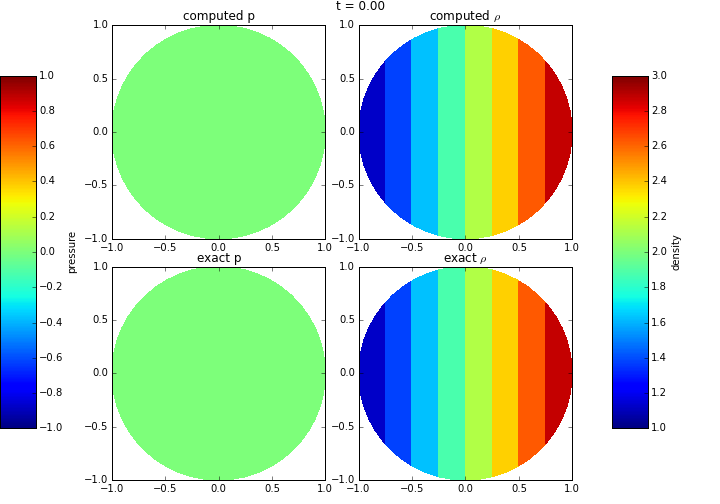
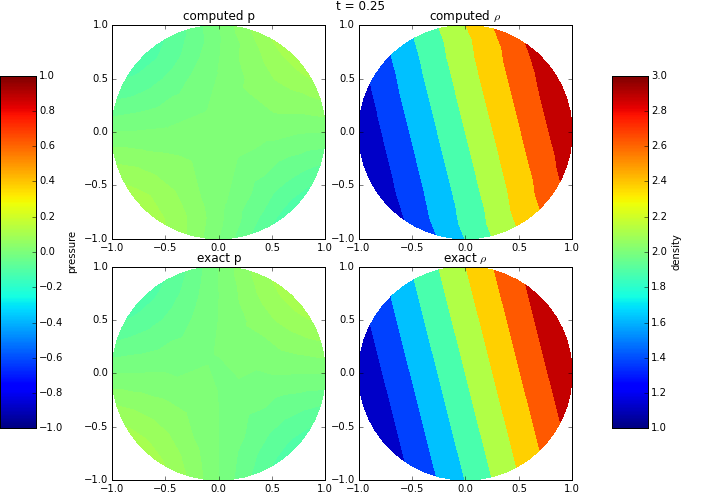
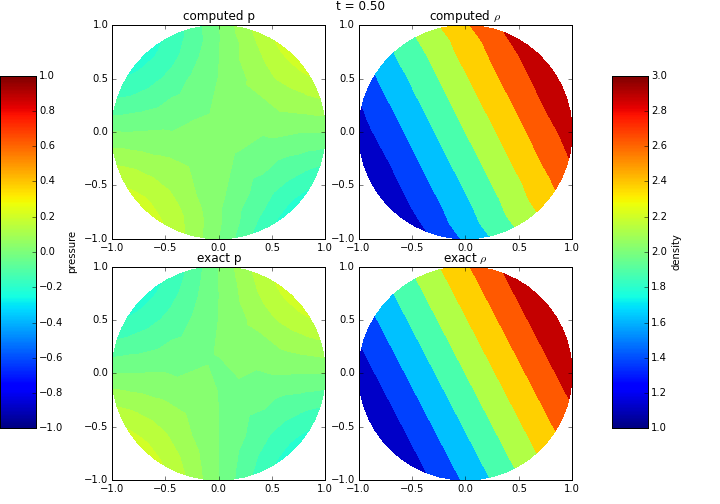
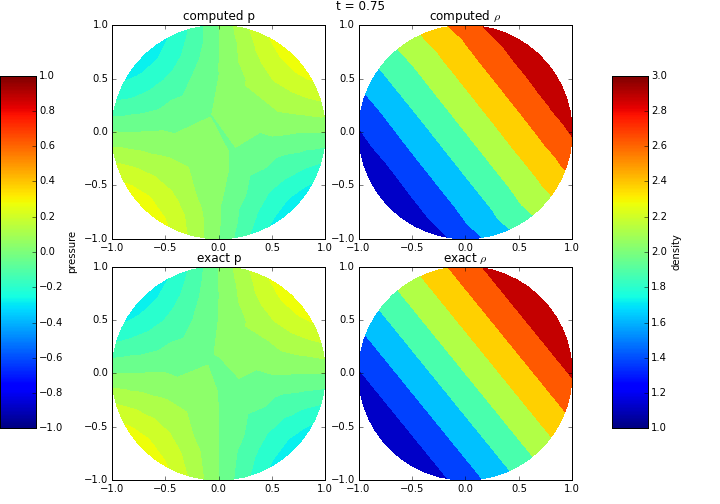
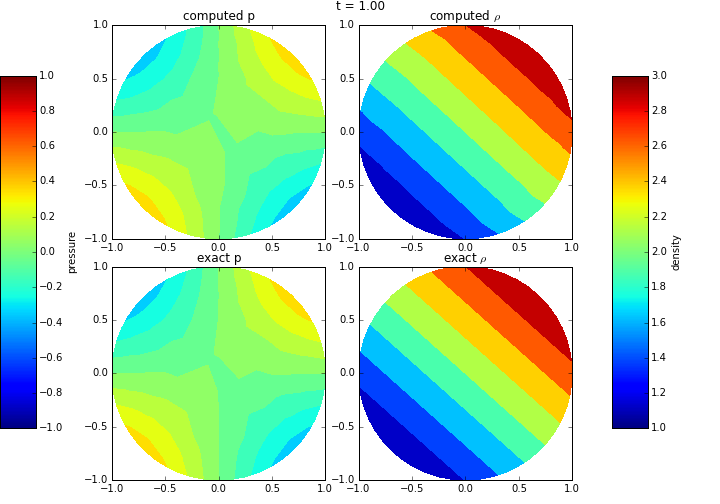
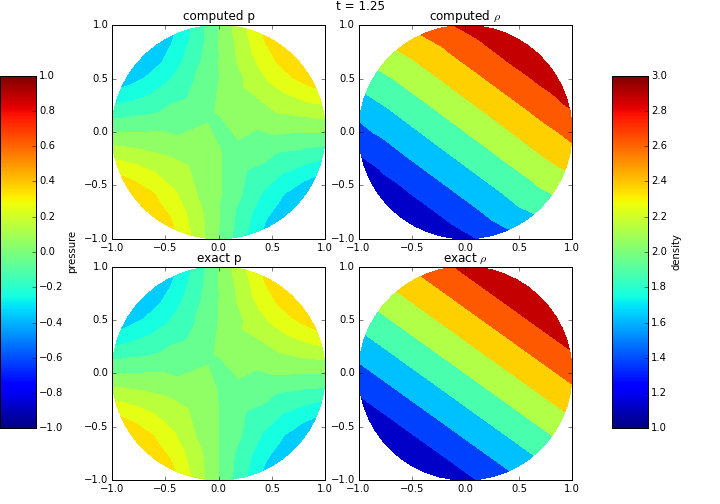
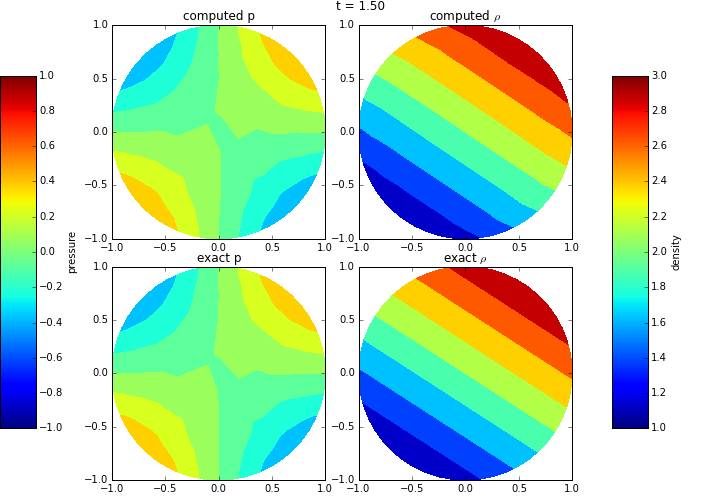
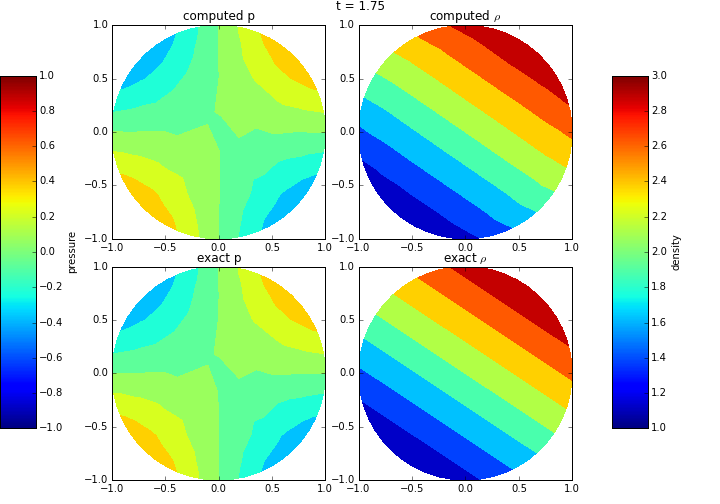
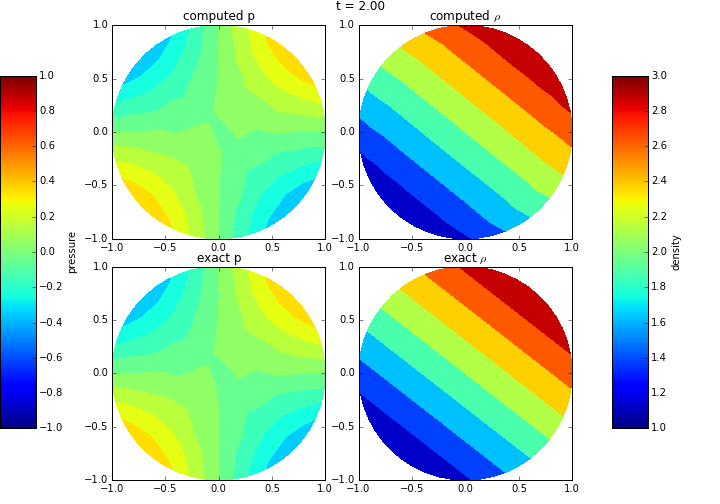
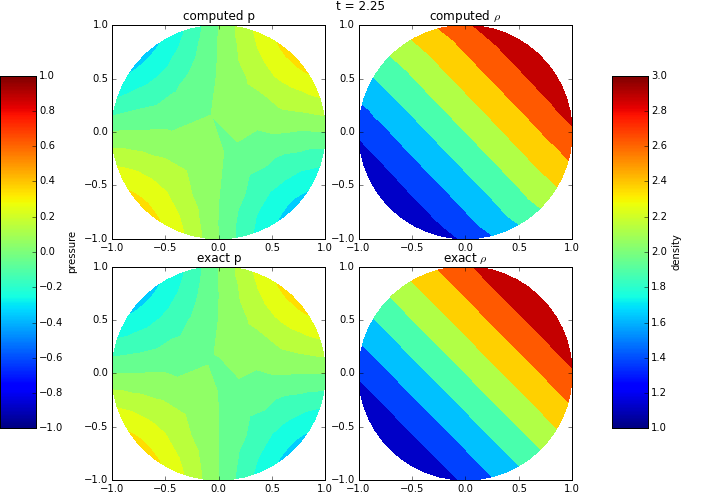
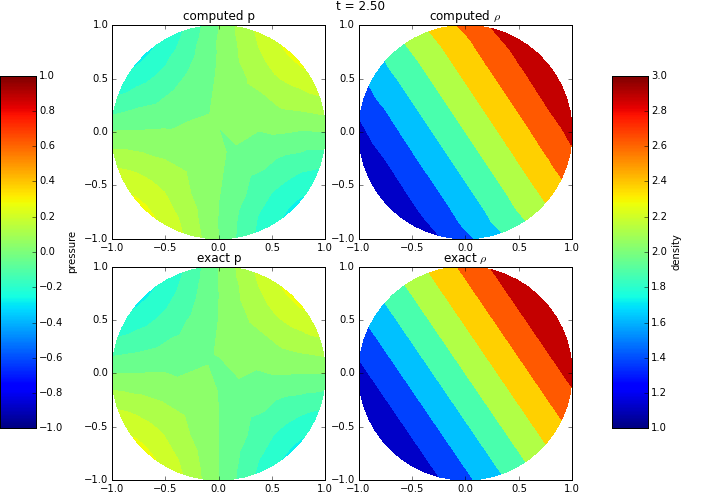
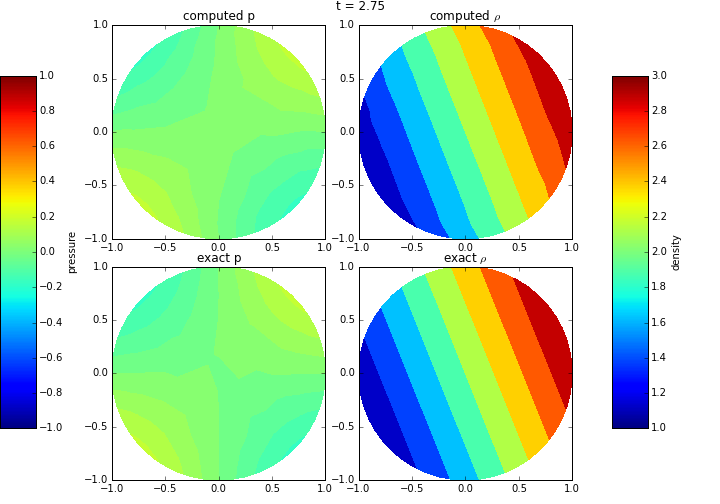
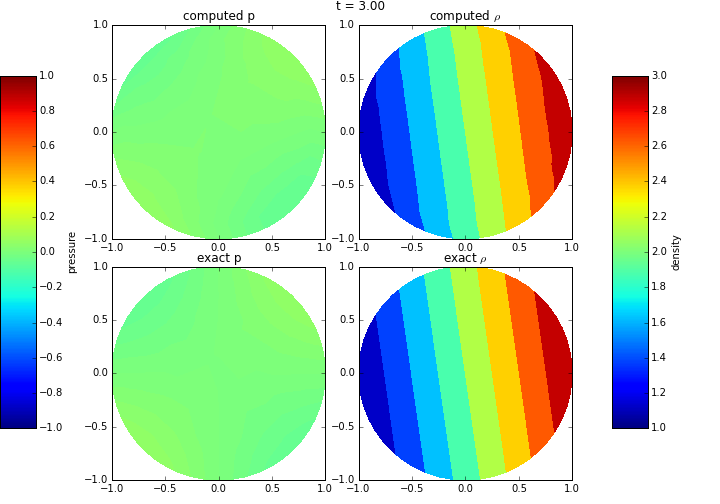
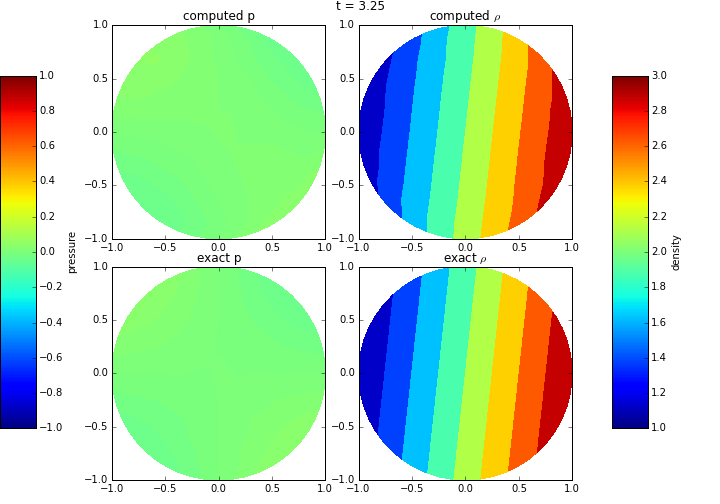
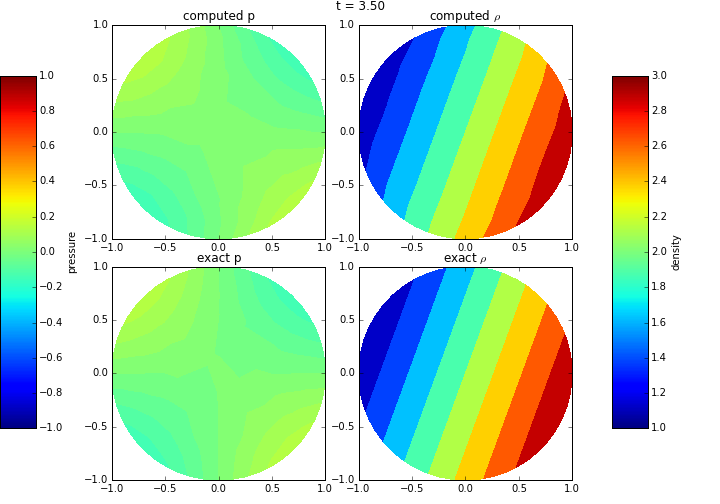
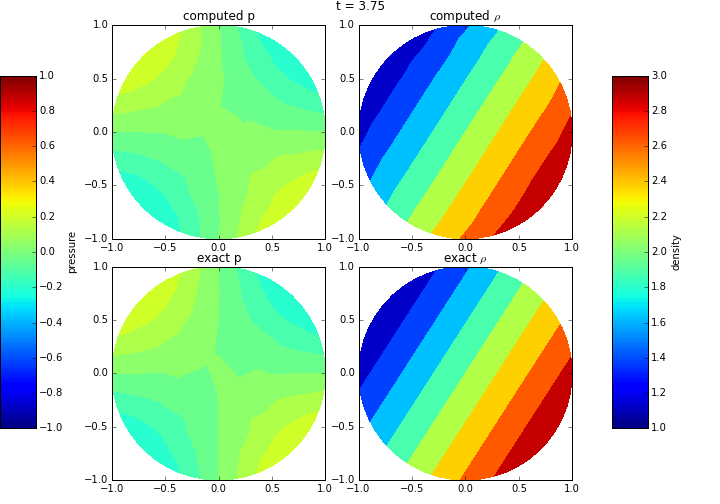
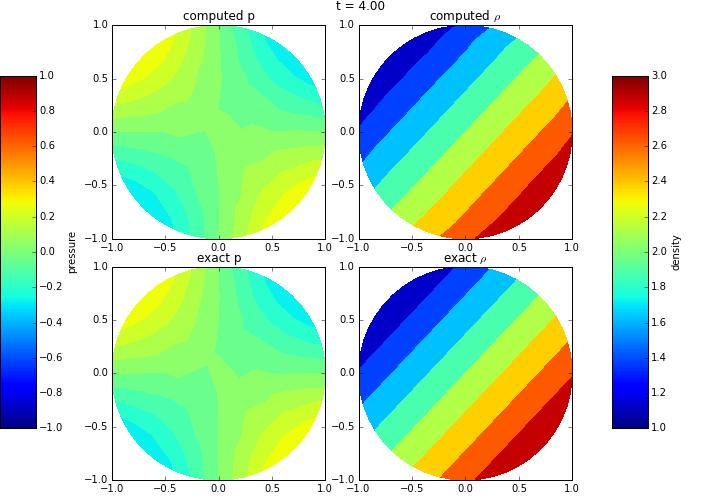
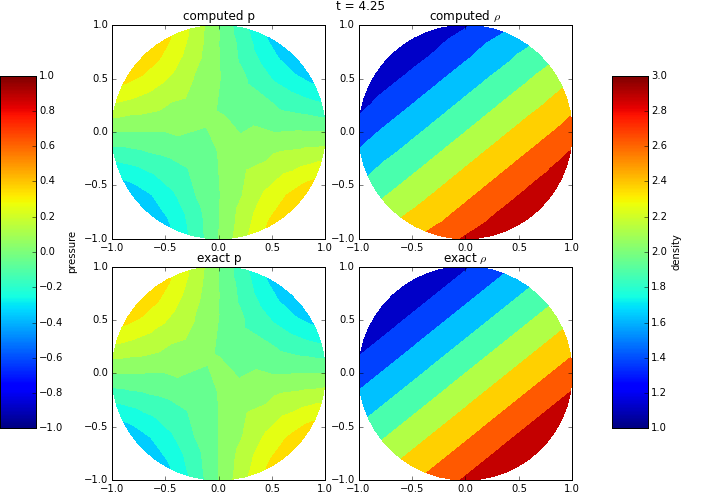
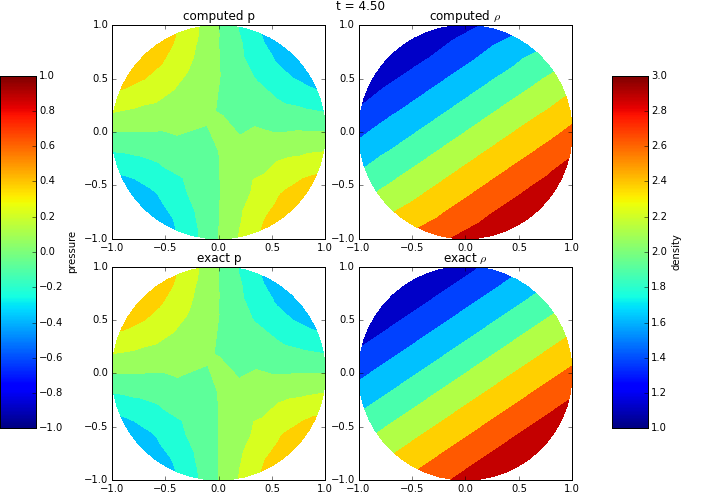
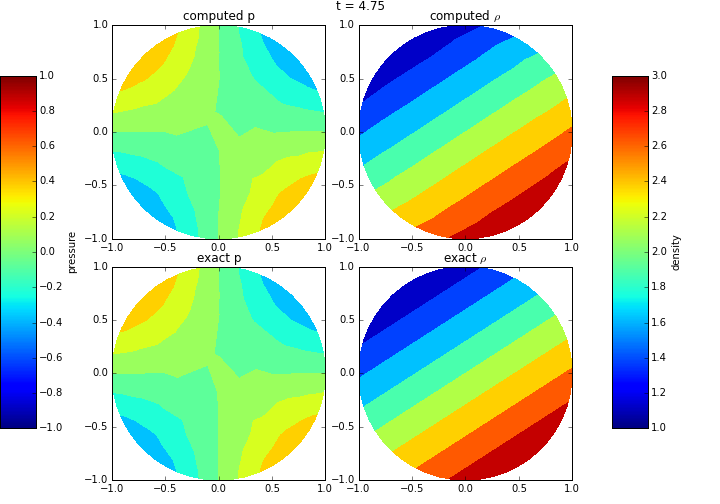
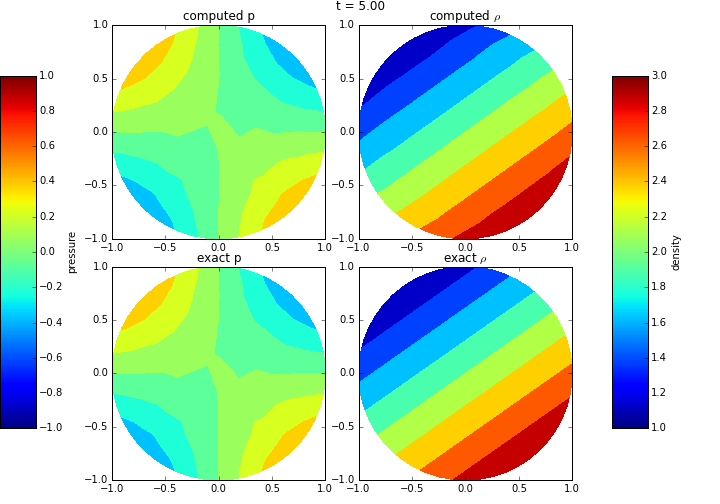
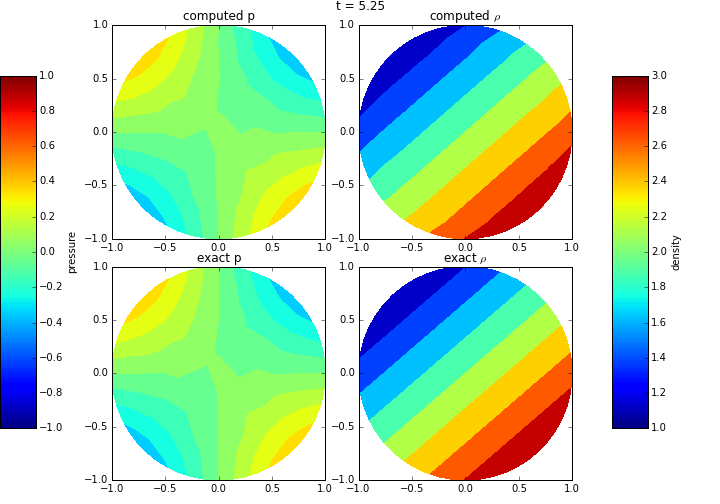
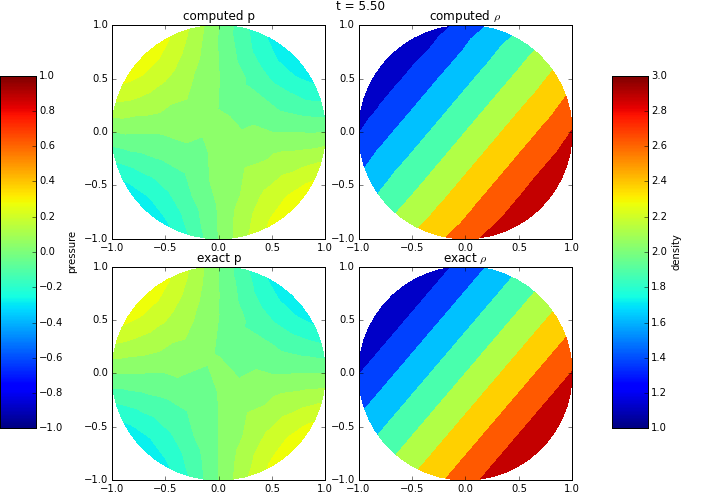
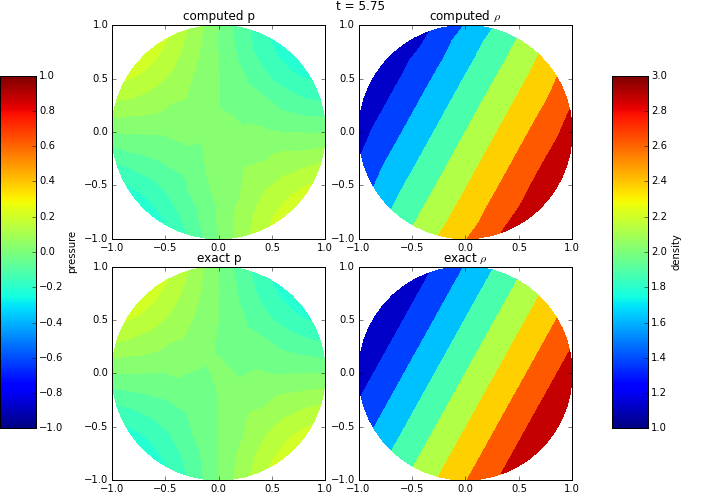
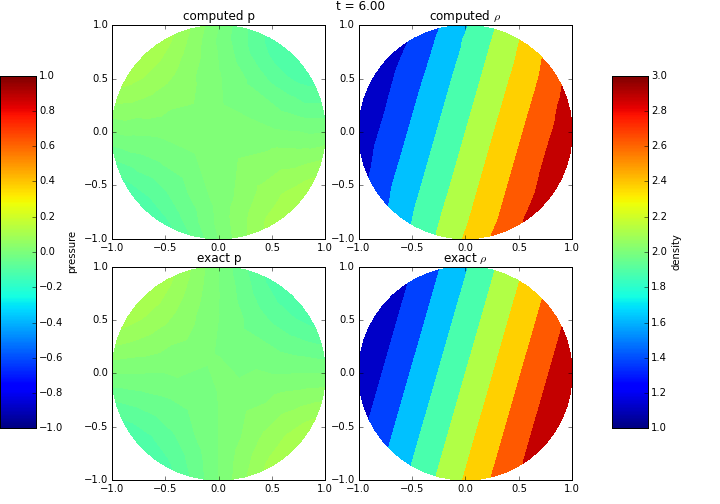
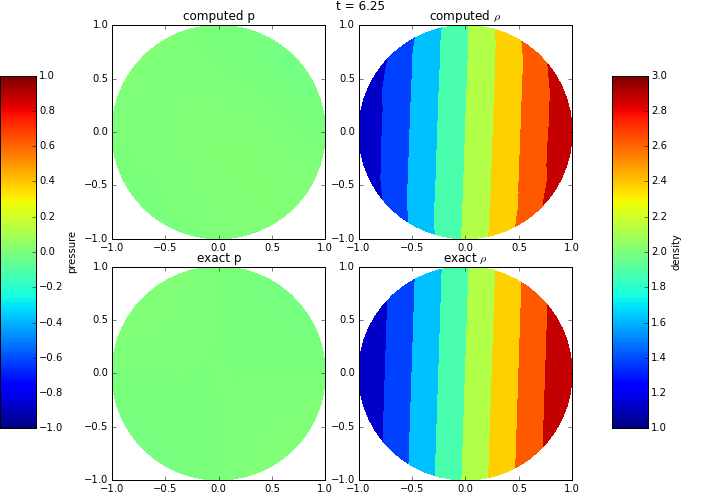
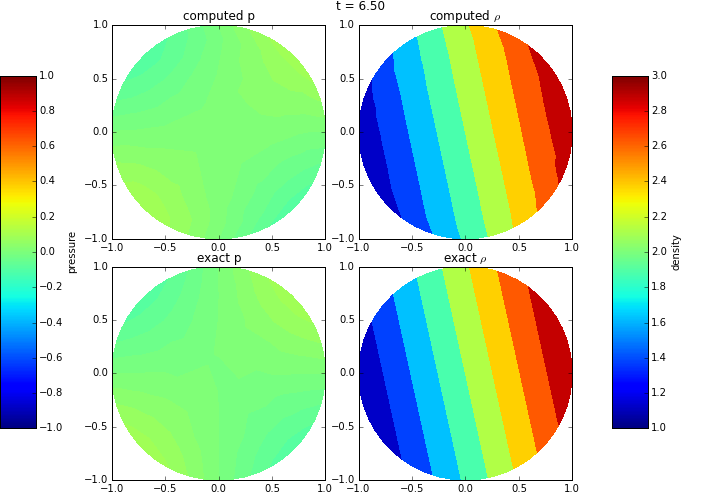
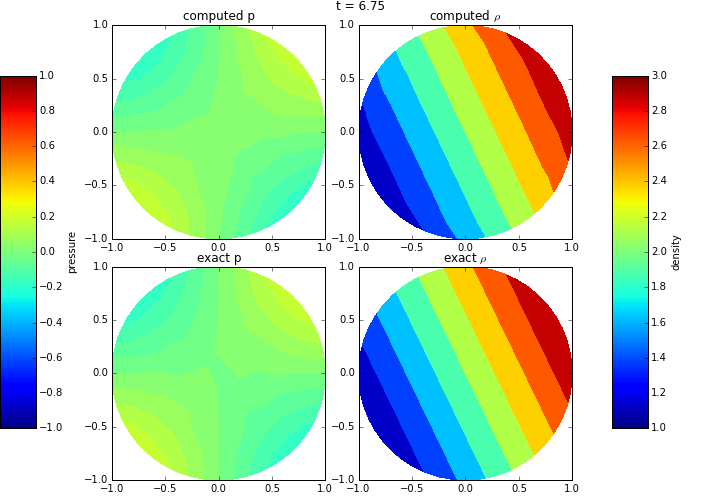
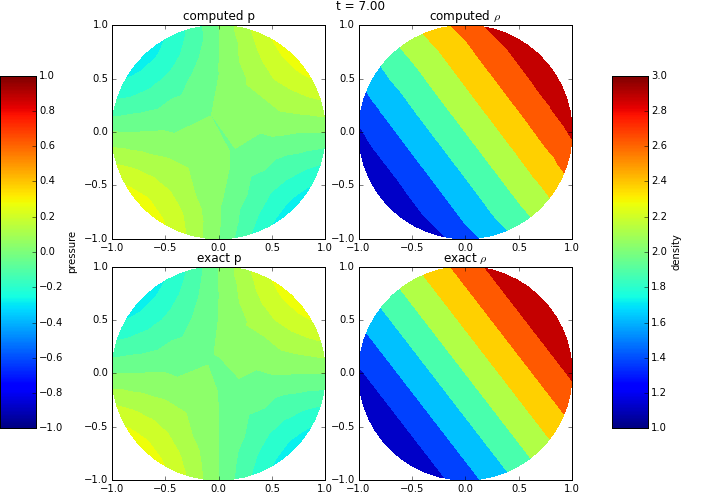
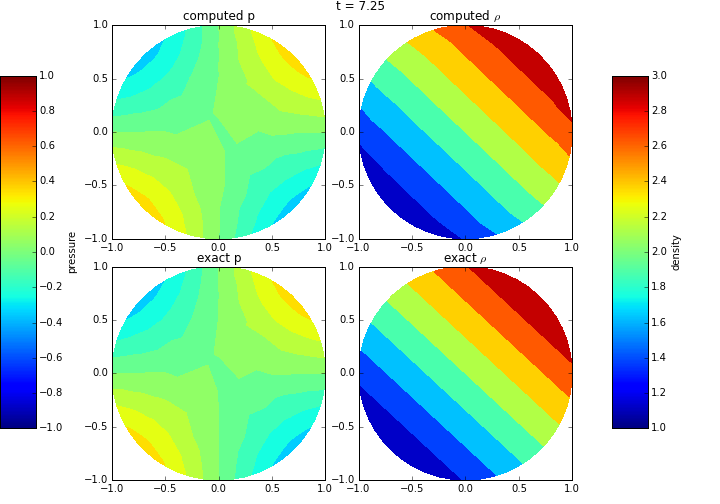
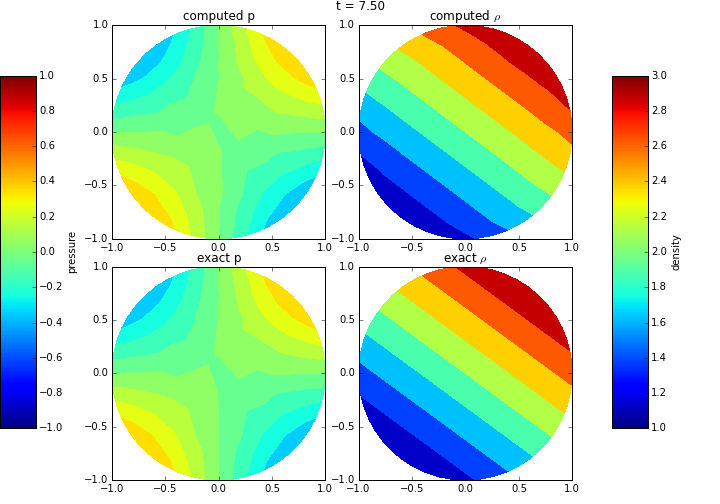
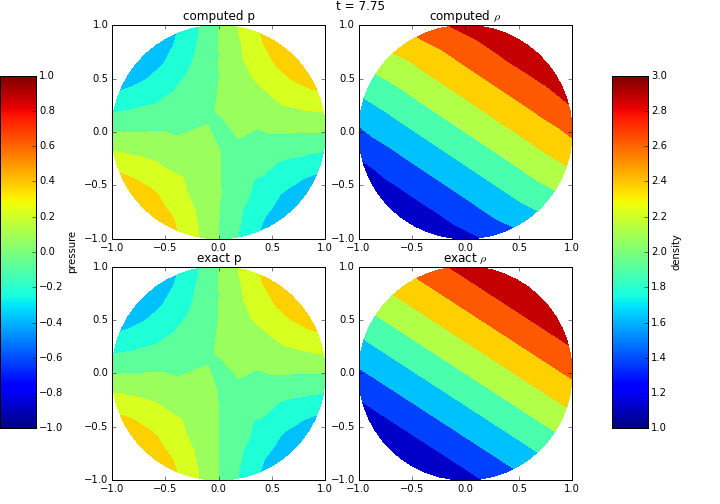
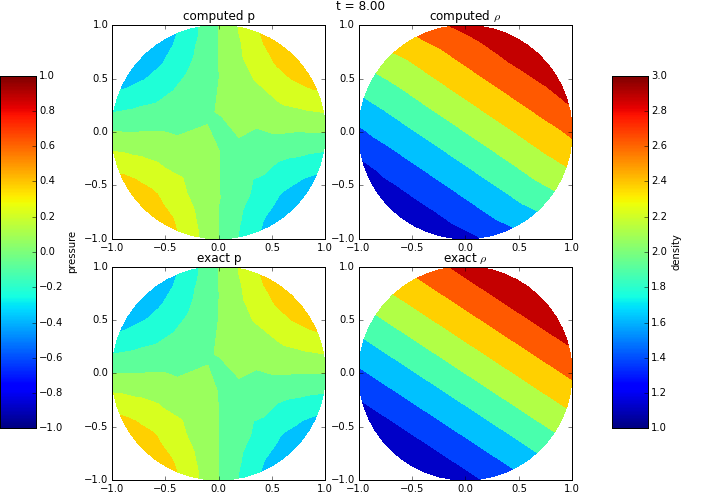
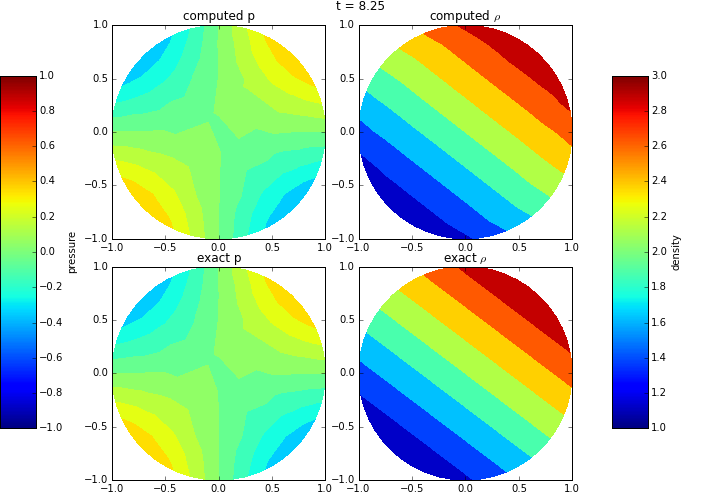
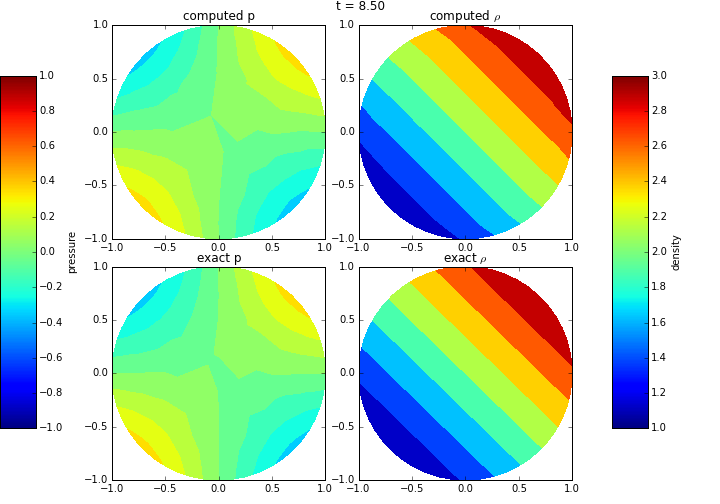
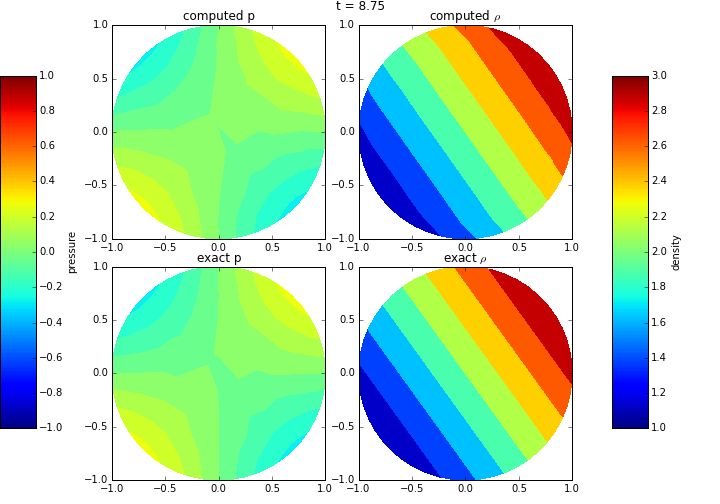
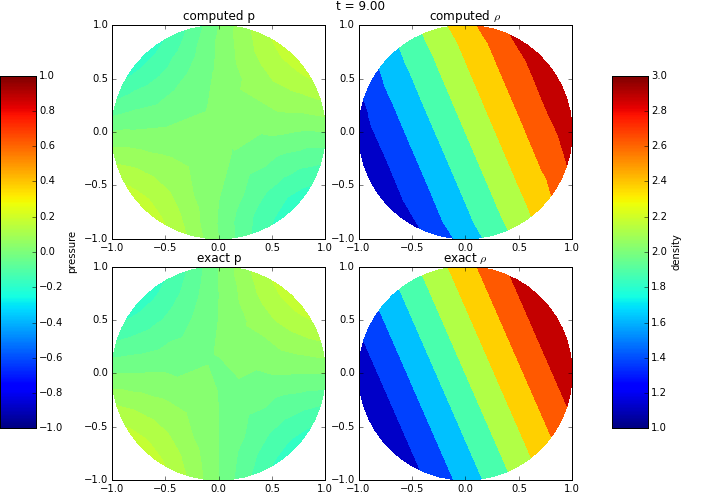
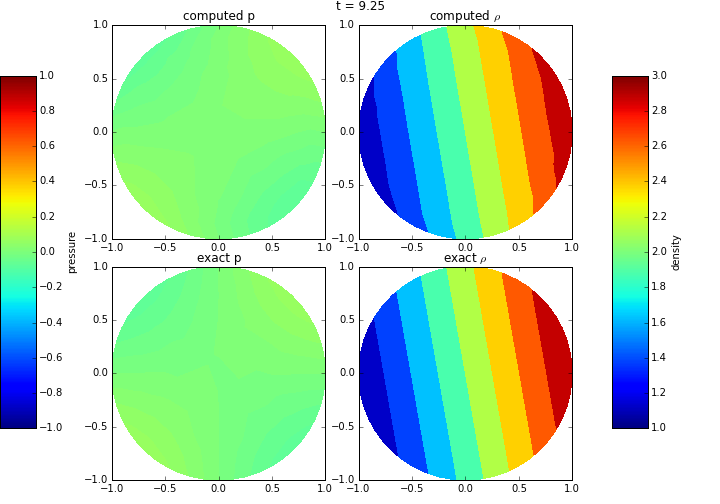
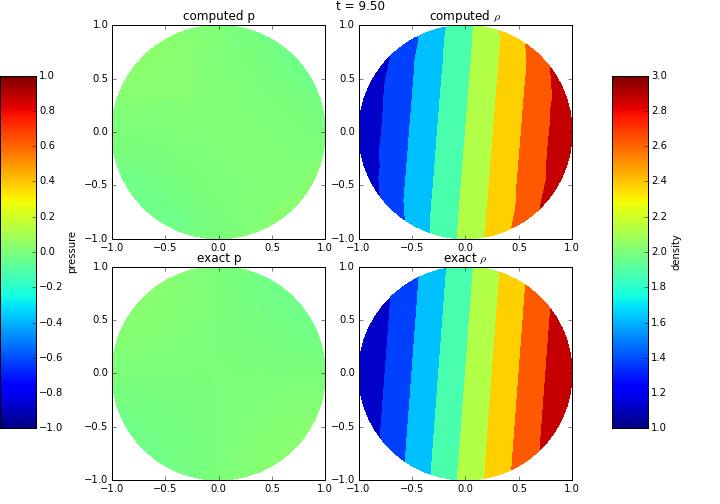
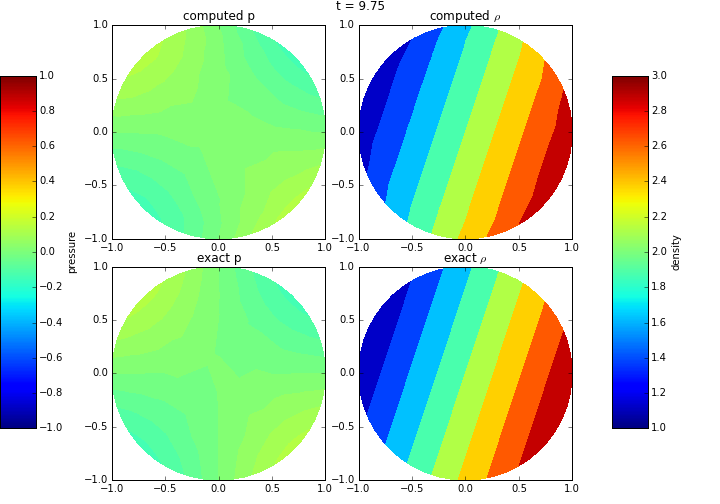
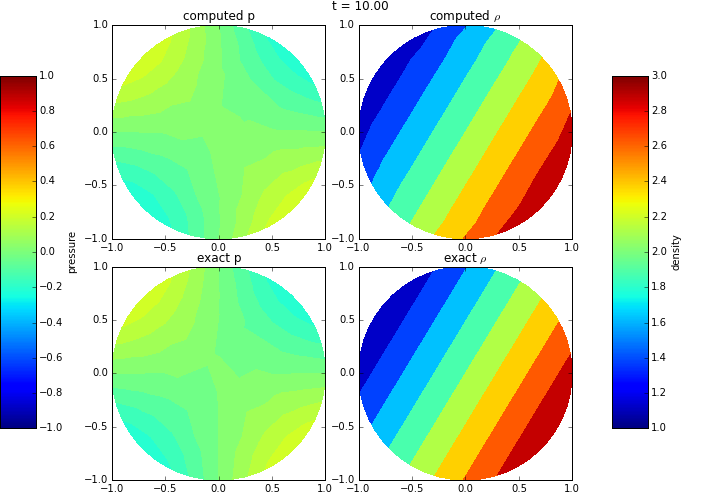

In [85]:

fig_density = plt.figure(figsize=(10,7)) # w, h in inches
axp = fig_density.add_subplot(221)
axep = fig_density.add_subplot(223)
axrho = fig_density.add_subplot(222)
axerho = fig_density.add_subplot(224)

fig_density.tight_layout() # spread out the plots so that they don't overlap
fig_density.subplots_adjust(left=0.15, right=0.8,top=0.95)

cbar_ax_right = fig_density.add_axes([0.85, 0.15, 0.05, 0.7])
cbar_ax_left = fig_density.add_axes([0.0, 0.15, 0.05, 0.7])

title = fig_density.suptitle("",x=0.5, y=1.0,
         horizontalalignment='center',
         fontsize=12,)

axp.set_aspect('equal')
axep.set_aspect('equal')
axrho.set_aspect('equal')
axerho.set_aspect('equal')

axp.set_title('computed p')
axep.set_title('exact p')
axrho.set_title('computed $\\rho$')
axerho.set_title('exact $\\rho$')

# normalization parameters for plots to make colors consistent across plots
pmin = -1.0  
pmax = 1.0
rhomin = 1.0
rhomax = 3.0

norm_p = plt.Normalize(vmin=pmin,vmax=pmax)
norm_rho = plt.Normalize(vmin=rhomin,vmax=rhomax)

# create scalar mappables that we will use for the colorbars to show entire range
# of colors instead of have them be autoscaled at each time step
#
# Thus the colorbars will be static instead of adapted to each shown plot
pfullrange = np.linspace(pmin,pmax,10)
rhofullrange = np.linspace(rhomin,rhomax,10)

sm_p = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_p)
sm_p.set_array(pfullrange)

sm_rho = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_rho)
sm_rho.set_array(rhofullrange)


# create animation plots

def init_density():
    c_p = axp.plot([],[])
    c_ep = axep.plot([],[])
    c_rho = axrho.plot([],[])
    c_erho = axerho.plot([],[])
    return (c_p, c_ep, c_rho, c_erho)

def animate_density(i):
    # time
    t = so.tnList[i]
    title.set_text("t = %.2f" %t)
    
    # density
    xvals = h5.getNode("/nodesSpatial_Domain%i" %i)[:]
    n = xvals.shape[0]
    triangles = h5.getNode("/elementsSpatial_Domain%i" %i)[:]
    
    p = h5.getNode("/p%i" %i)[:]
    p_true = so.ctx.ptrue(xvals,t)
    rho_comp = h5.getNode("/rho%i" %i)[:n]
    rho_true = so.ctx.rhotrue(xvals,t)
        
    c_p = axp.tricontourf(xvals[:,0],xvals[:,1], triangles, p, norm=norm_p)
    c_ep = axep.tricontourf(xvals[:,0],xvals[:,1], triangles, p_true, norm=norm_p)
    c_rho = axrho.tricontourf(xvals[:,0],xvals[:,1],triangles,rho_comp, norm=norm_rho)
    c_erho = axerho.tricontourf(xvals[:,0],xvals[:,1],triangles,rho_true, norm=norm_rho)
        
    cbar_p = fig_density.colorbar(sm_p,cax=cbar_ax_left, norm=norm_p)
    cbar_p.set_label("pressure")
    
    cbar_rho = fig_density.colorbar(sm_rho, cax=cbar_ax_right, norm=norm_rho)
    cbar_rho.set_label("density")
    
    plt.show() # force the legends and formatting to show up

    return (c_p, c_ep, c_rho, c_erho)


animation.FuncAnimation(fig_density, animate_density, init_func=init_density,
                        frames=len(so.ctx.tnList), interval=30, blit=True) # 30 milliseconds between frames  

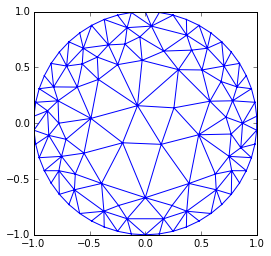

In [86]:
fig_mesh = plt.figure(figsize=(4,4)) # w, h in inches
nodes = h5.getNode("/nodesSpatial_Domain%i" %0)[:]
triangles = h5.getNode("/elementsSpatial_Domain%i" %0)[:]
plt.triplot(nodes[:,0],nodes[:,1],triangles)
plt.axis('equal')

# close the table file after extracting all the solutions for the movie above
h5.close()